<a href="https://colab.research.google.com/github/saishrane06/Exploratory-Data-Analysis/blob/main/Laptop_Price_Advanced_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download muhammetvarl/laptop-price

  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 21.0MB/s]


In [2]:
! unzip laptop-price.zip

Archive:  laptop-price.zip
  inflating: laptop_price.csv        


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## pandas set_option is used to show all the columns in the result
pd.pandas.set_option('display.max_columns',None)

In [4]:
laptop_df = pd.read_csv("laptop_price.csv",encoding='latin-1')
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
laptop_df.shape

(1303, 13)

In [6]:
laptop_df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


In [7]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


### **Data Analysis**
Agenda to do under data analysis

1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature


**Missing Values**

In [8]:
laptop_missing_values = [feature for feature in laptop_df.columns if laptop_df[feature].isna().any()]
laptop_missing_values

[]

There are no mising values in the dataframe.

**Numerical Variables**

In [9]:
laptop_numerical_data = [feature for feature in laptop_df.columns if laptop_df[feature].dtype != "O"]
laptop_numerical_data

['laptop_ID', 'Inches', 'Price_euros']

In [10]:
## Numerical variables are of two types
## Discrete vriable and Continuous variable

laptop_discrete_variable = [feature for feature in laptop_numerical_data if len(laptop_df[feature].unique())<15 and feature not in ['laptop_ID']]
laptop_discrete_variable

[]

In [11]:
laptop_continuous_variable = [feature for feature in laptop_numerical_data if feature not in laptop_discrete_variable+['laptop_ID']]
laptop_continuous_variable

['Inches', 'Price_euros']

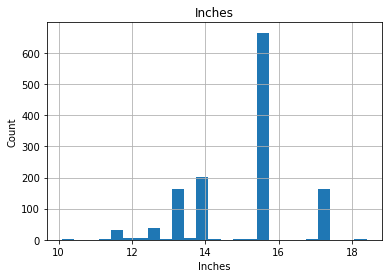

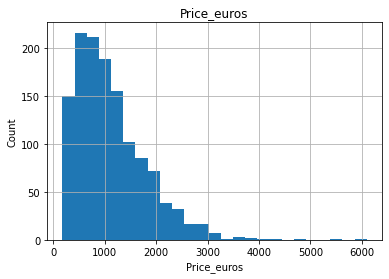

In [12]:
for feature in laptop_continuous_variable:
    data=laptop_df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

To maintain the skewness/distribution of the data we are using logarithmic trasformation using the inbuilt numpy np.log() function.

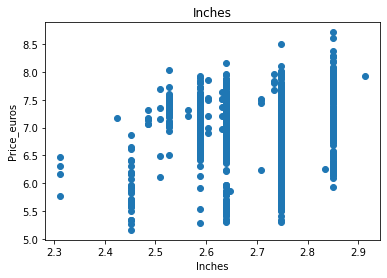

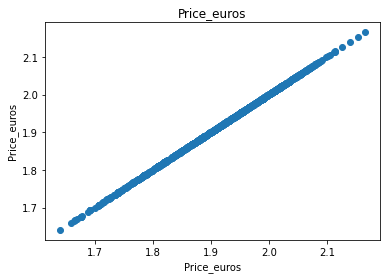

In [13]:
for feature in laptop_continuous_variable:
  data = laptop_df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]  = np.log(data[feature])
    data['Price_euros'] = np.log(data['Price_euros'])
    plt.scatter(data[feature],data['Price_euros'])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price_euros')
    plt.show()

**Outliers**

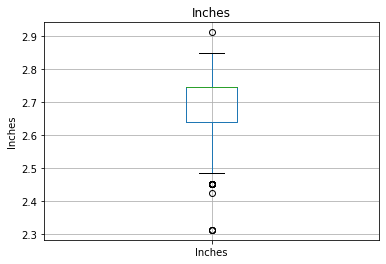

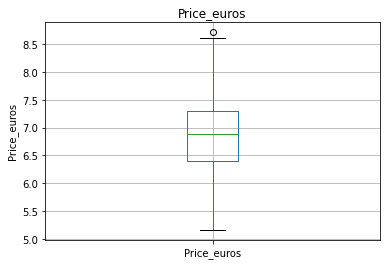

In [14]:
for feature in laptop_continuous_variable:
  data = laptop_df.copy()
  if 0 in data[feature].unique():
    pass
  else:
    data[feature]  = np.log(data[feature])
    data.boxplot(column=feature)
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

**Categorical Variables**

In [15]:
laptop_categorical_data = [feature for feature in laptop_df.columns if laptop_df[feature].dtype == "O"]
laptop_categorical_data

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [16]:
for feature in laptop_categorical_data:
  print("the feature is {} and number of categories are {}".format(feature,len(data[feature].unique())))

the feature is Company and number of categories are 19
the feature is Product and number of categories are 618
the feature is TypeName and number of categories are 6
the feature is ScreenResolution and number of categories are 40
the feature is Cpu and number of categories are 118
the feature is Ram and number of categories are 9
the feature is Memory and number of categories are 39
the feature is Gpu and number of categories are 110
the feature is OpSys and number of categories are 9
the feature is Weight and number of categories are 179


Finding the relationship between categorical feature variable and dependent variable

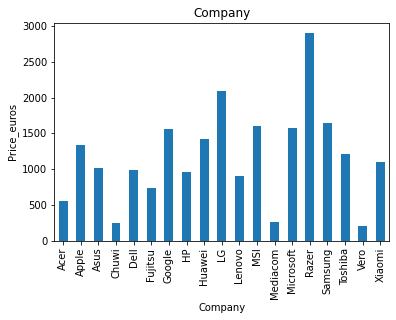

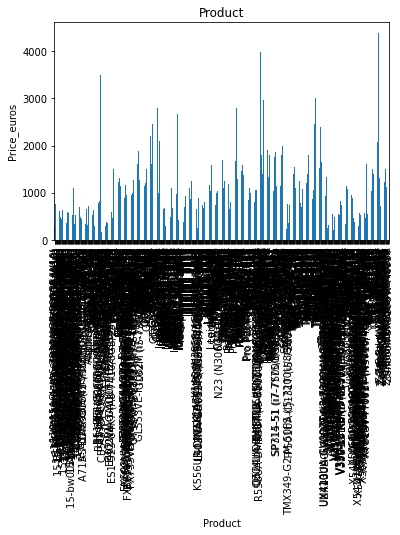

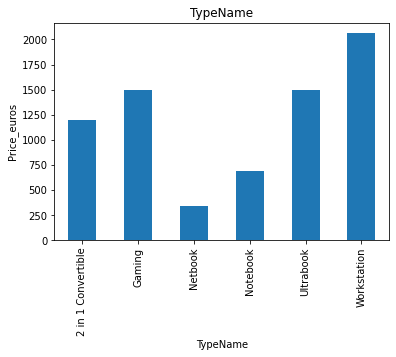

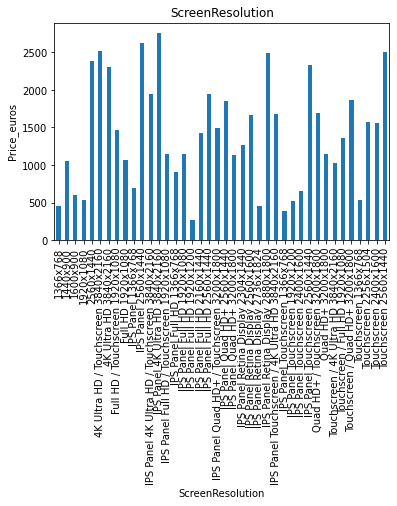

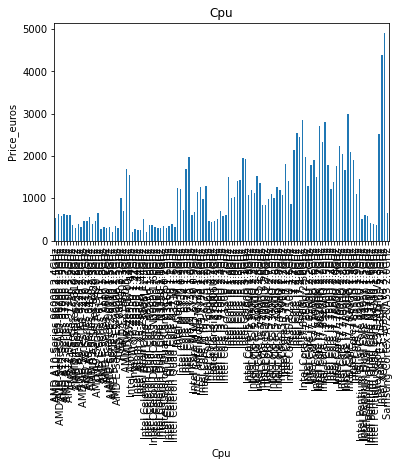

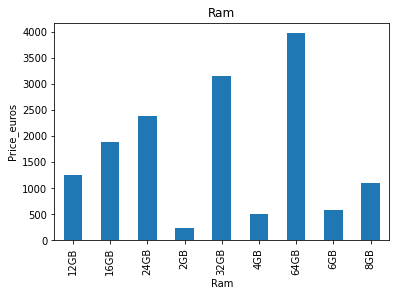

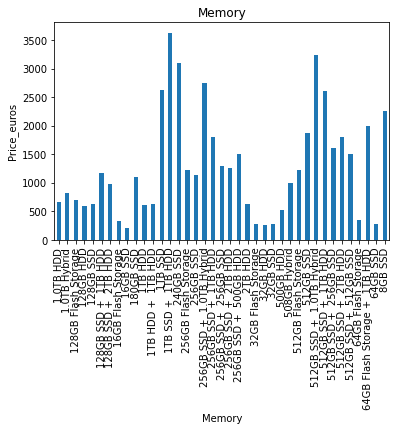

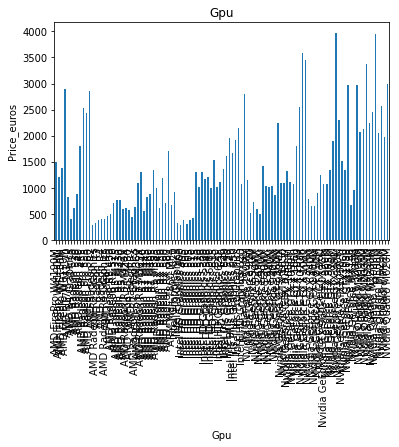

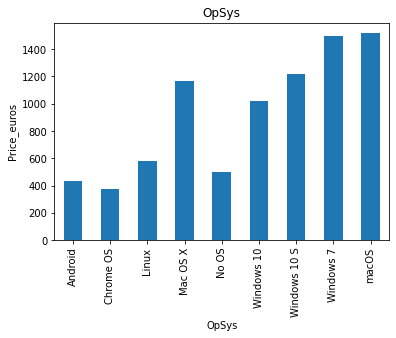

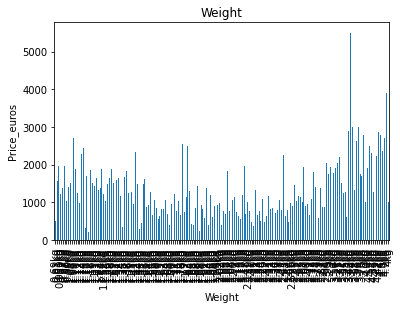

In [17]:
for feature in laptop_categorical_data:
    data=laptop_df.copy()
    data.groupby(feature)['Price_euros'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Price_euros')
    plt.title(feature)
    plt.show()

### **Feature Engineering**

Agenda to solve under Feature Engineering
1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range




In [18]:
## train test split
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(laptop_df.drop('Price_euros',axis=1),laptop_df['Price_euros'],test_size=0.1,random_state=0)


**Missing Values**

In [19]:
## Finding missing categorical feature values and handling them.

categorical_nan = [feature for feature in laptop_df.columns if laptop_df[feature].isnull().sum()>1 and laptop_df[feature].dtypes=="O"]

for feature in categorical_nan:
  print("{} : {}% missing values".format(feature,np.round(laptop_df[feature].isnull().mean(),4)))

In [20]:
### There are no nan/null values in the categorical features

In [21]:
## Finding missing numerical feature values and handling them.
numerical_nan = [feature for feature in laptop_df.columns if laptop_df[feature].isnull().sum()>1 and laptop_df[feature].dtypes!="O"]

for feature in numerical_nan:
  print("{} : {}% missing values".format(feature,np.round(laptop_df[feature].isnull().mean(),4)))

In [22]:
### There are no nan/null values in the numerical features

**Numercal Variables**

Since the numerical variables are skewed we will perform log normal distribution

In [23]:
num_features = ['Inches', 'Price_euros']

for feature in num_features:
  laptop_df[feature] = np.log(laptop_df[feature])

In [24]:
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,2.587764,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,7.200194
1,2,Apple,Macbook Air,Ultrabook,2.587764,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,6.801216
2,3,HP,250 G6,Notebook,2.747271,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,6.354370
3,4,Apple,MacBook Pro,Ultrabook,2.734368,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,7.838915
4,5,Apple,MacBook Pro,Ultrabook,2.587764,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,7.497540


**Handling Rare Categorical Feature**

We will remove categorical variables that are present less than 1% of the observations

In [25]:
categorical_features=[feature for feature in laptop_df.columns if laptop_df[feature].dtype=='O']

for feature in categorical_features:
    temp=laptop_df.groupby(feature)['Price_euros'].count()/len(laptop_df)
    temp_df=temp[temp>0.01].index
    laptop_df[feature]=np.where(laptop_df[feature].isin(temp_df),laptop_df[feature],'Rare_var')

In [26]:
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,Rare_var,Ultrabook,2.587764,Rare_var,Rare_var,8GB,128GB SSD,Rare_var,Rare_var,Rare_var,7.200194
1,2,Apple,Rare_var,Ultrabook,2.587764,Rare_var,Rare_var,8GB,Rare_var,Rare_var,Rare_var,Rare_var,6.801216
2,3,HP,250 G6,Notebook,2.747271,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,6.354370
3,4,Apple,Rare_var,Ultrabook,2.734368,Rare_var,Rare_var,16GB,512GB SSD,Rare_var,Rare_var,Rare_var,7.838915
4,5,Apple,Rare_var,Ultrabook,2.587764,Rare_var,Rare_var,8GB,256GB SSD,Rare_var,Rare_var,Rare_var,7.497540


In [27]:
for feature in categorical_features:
    labels_ordered=laptop_df.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    laptop_df[feature]=laptop_df[feature].map(labels_ordered)

In [28]:
laptop_df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,7,6,3,2.587764,7,6,3,5,10,4,17,7.200194
1,2,7,6,3,2.587764,7,6,3,6,10,4,17,6.801216
2,3,3,0,1,2.747271,3,7,3,7,11,1,0,6.354370
3,4,7,6,3,2.734368,7,6,5,9,10,4,17,7.838915
4,5,7,6,3,2.587764,7,6,3,7,10,4,17,7.497540


**Feature Scaling**

In [29]:
feature_scale=[feature for feature in laptop_df.columns if feature not in ['laptop_ID','Price_euros'] ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(laptop_df[feature_scale])

MinMaxScaler()

In [30]:
scaler.transform(laptop_df[feature_scale])

array([[0.875     , 0.66666667, 0.6       , ..., 0.5       , 0.8       ,
        0.70833333],
       [0.875     , 0.66666667, 0.6       , ..., 0.5       , 0.8       ,
        0.70833333],
       [0.375     , 0.        , 0.2       , ..., 0.55      , 0.2       ,
        0.        ],
       ...,
       [0.125     , 0.66666667, 0.2       , ..., 0.1       , 0.6       ,
        0.08333333],
       [0.375     , 0.66666667, 0.2       , ..., 0.5       , 0.6       ,
        0.70833333],
       [0.25      , 0.66666667, 0.2       , ..., 0.1       , 0.6       ,
        0.16666667]])

In [31]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([laptop_df[['laptop_ID', 'Price_euros']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(laptop_df[feature_scale]), columns=feature_scale)],
                    axis=1)

In [32]:
data.head()

,laptop_ID,Price_euros,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
0,1,7.200194,0.875,0.666667,0.6,0.458856,0.875,0.352941,0.428571,0.416667,0.50,0.8,0.708333
1,2,6.801216,0.875,0.666667,0.6,0.458856,0.875,0.352941,0.428571,0.500000,0.50,0.8,0.708333
2,3,6.354370,0.375,0.000000,0.2,0.724782,0.375,0.411765,0.428571,0.583333,0.55,0.2,0.000000
3,4,7.838915,0.875,0.666667,0.6,0.703270,0.875,0.352941,0.714286,0.750000,0.50,0.8,0.708333
4,5,7.497540,0.875,0.666667,0.6,0.458856,0.875,0.352941,0.428571,0.583333,0.50,0.8,0.708333


### **Feature Selection**

In [33]:
## droping dependent featuresfrom dataset
X = data.drop(['laptop_ID','Price_euros'],axis=1)

In [34]:
## Capture the dependent feature
y = data[['Price_euros']]

In [35]:
## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [36]:
feature_sel_model.get_support()

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True])

In [37]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 11
selected features: 9


In [38]:
selected_feat

Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight'],
      dtype='object')

In [39]:
X = X[selected_feat]

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_regression = LinearRegression()
mse = cross_val_score(linear_regression,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse = np.mean(mse)
print(mean_mse)

-0.0885207687991077


In [42]:
linear_regression.fit(X,y)
y_pred = linear_regression.predict(X_test)
print(y_pred)

[[6.54761193]
 [7.50272037]
 [7.30383305]
 [5.96564361]
 [7.6834252 ]
 [6.19198851]
 [6.0001912 ]
 [6.05802017]
 [6.88966733]
 [7.28058337]
 [7.21022818]
 [6.36794463]
 [6.03416024]
 [6.93558532]
 [7.7379303 ]
 [6.92452146]
 [6.27649416]
 [7.77897941]
 [7.53157705]
 [7.50183742]
 [5.88634045]
 [7.73646138]
 [6.05235138]
 [6.89438557]
 [6.65831936]
 [6.58404982]
 [6.27496492]
 [6.4685767 ]
 [6.4240921 ]
 [7.15867037]
 [6.62286874]
 [6.17352421]
 [7.06057333]
 [6.83079512]
 [7.8442023 ]
 [7.04765837]
 [7.59263226]
 [6.07668321]
 [7.22251537]
 [7.26607487]
 [7.75250672]
 [7.21959095]
 [7.83131631]
 [6.97297355]
 [7.29262186]
 [6.31794263]
 [7.33923151]
 [6.66964253]
 [6.9684753 ]
 [6.39379731]
 [6.72192563]
 [7.72659834]
 [5.93009238]
 [6.66430193]
 [6.5551121 ]
 [7.10129726]
 [6.017911  ]
 [6.9877322 ]
 [7.21959095]
 [7.24421176]
 [7.34026243]
 [6.75622649]
 [6.6718911 ]
 [7.69033514]
 [7.60953355]
 [7.8477213 ]
 [6.54388515]
 [7.52850904]
 [7.09908996]
 [7.25607094]
 [6.66192518]
 [7.43

In [43]:
from sklearn.metrics import r2_score
print("Accuracy of the model : ",r2_score(y_test,y_pred))

Accuracy of the model :  0.7612773957294037
